In [1]:
import SimpleITK as sitk
print(sitk.Version())

import matplotlib.pyplot as plt
import numpy as np

SimpleITK Version: 1.2.0 (ITK 4.13)
Compiled: Jan  3 2019 16:23:05



In [2]:
print("Lecture 04")

img_file_name = "GFP_06-DAPI.tif"
print("... reading image from file: " + img_file_name)

Lecture 04
... reading image from file: GFP_06-DAPI.tif


Image has been loaded.
****************************************
Image (0x7fac66198530)
  RTTI typeinfo:   itk::Image<unsigned char, 2u>
  Reference Count: 1
  Modified Time: 943
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 933
  UpdateMTime: 942
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [800, 634]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [800, 634]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [800, 634]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x600002c55ce0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 1
      Modified Time: 939
      Debu

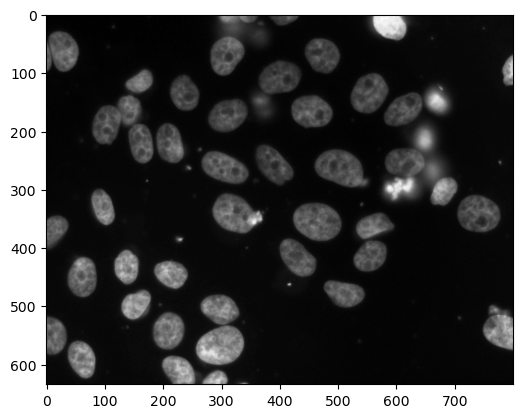

In [3]:
'''Convert image to array and use matplotlib '''
itkImage = sitk.ReadImage(img_file_name)
print('Image has been loaded.')
print('*' * 40)
print(itkImage)
numpyArray = sitk.GetArrayFromImage(itkImage)
plt.imshow(numpyArray, cmap='gray')
plt.show()

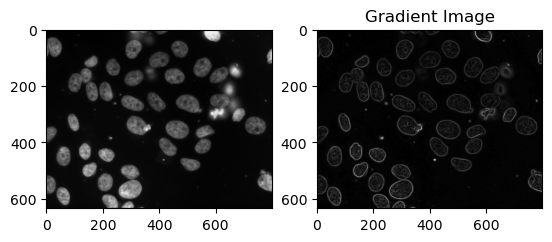

In [4]:
# Directly computing gradient image

itkImage = sitk.Cast(itkImage, sitk.sitkFloat32)
#grad_filter = sitk.GradientImageFilter()
#grad = grad_filter.Execute(itkImage)
grad = sitk.Gradient(itkImage)
arr = sitk.GetArrayFromImage(grad)
# Compute the magnitude of the gradient image
grad_mag = np.sqrt(np.sum(arr**2, axis=2))

plt.subplot(1,2,1)
plt.imshow(numpyArray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Image')
plt.show()

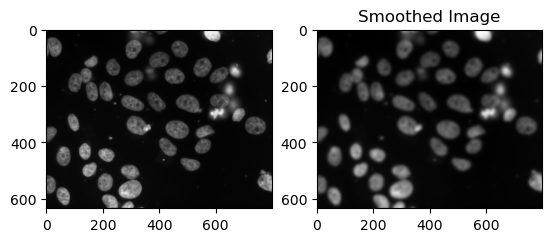

In [5]:
# Cast image to float32 !!!
itkImage = sitk.Cast(itkImage, sitk.sitkFloat32)
smoothed_image = sitk.SmoothingRecursiveGaussian(itkImage, 4.0)
#fNameOut =  'SmoothingRecursiveGaussian.tif'
#sitk.WriteImage(sitk.Cast(smooth, sitk.sitkUInt8), fNameOut)

plt.subplot(1,2,1)
plt.imshow(numpyArray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(smoothed_image), cmap='gray')
plt.title('Smoothed Image')
plt.show()

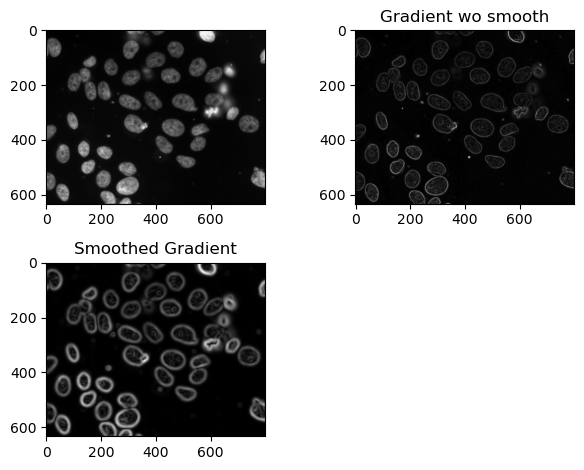

In [6]:
# Compute gradient after smoothing
#grad = grad_filter.Execute(smoothed_image)
grad = sitk.Gradient(smoothed_image)
arr = sitk.GetArrayFromImage(grad)
smoothed_grad_mag = np.sqrt(np.sum(arr**2, axis=2))

plt.subplot(2,2,1)
plt.imshow(numpyArray, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient wo smooth')
plt.subplot(2,2,3)
plt.imshow(smoothed_grad_mag, cmap='gray')
plt.title('Smoothed Gradient')

plt.tight_layout()
plt.show()

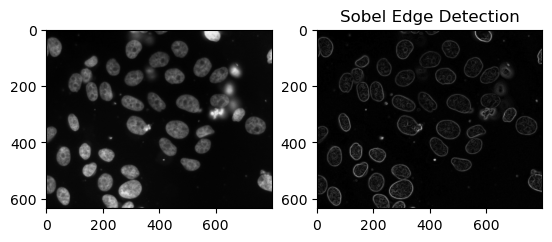

In [7]:
sobelImage = sitk.SobelEdgeDetection(itkImage)
#fNameOut =  'SobelEdgeDetection.tif'
#sitk.WriteImage(sitk.Cast(sobelImage, sitk.sitkUInt8), fNameOut)   
plt.subplot(1,2,1)
plt.imshow(numpyArray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(  sitk.GetArrayFromImage(sobelImage), cmap='gray'  )
plt.title('Sobel Edge Detection')
plt.show()

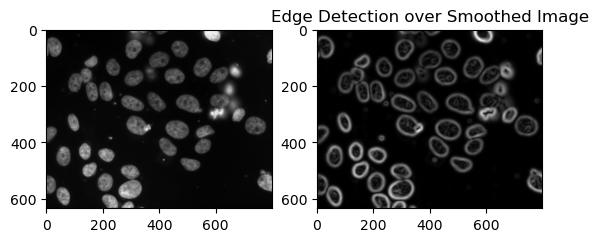

In [8]:
sobelImageSmooth = sitk.SobelEdgeDetection(smoothed_image)
plt.subplot(1,2,1)
plt.imshow(numpyArray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(  sitk.GetArrayFromImage(sobelImageSmooth), cmap='gray'  )
plt.title('Edge Detection over Smoothed Image')
plt.show()